In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
from astropy.time import Time


In [2]:
from alerce.api import AlerceAPI
client = AlerceAPI()

In [3]:
t2=pd.read_csv('Table2.txt', comment='#',sep= '\s+')

In [4]:
cepi=t2[(t2.Type=='CEP')]
cepii=t2[(t2.Type=='CEPII')]
#cepmask=['CEP'in a for a in t2['Type'].values]
#cep=t2[cepmask]
cep=t2[t2['Type'].isin(['CEP','CEPII'])]

In [5]:
def qcoord (ob): 
    params = {
        "records_per_pages": 100,
        "query_parameters": {
            "coordinates":{
                "ra": ob.RAdeg,
                "dec": ob.DEdeg,
                "sr": 1#arcsec
            },}
    }
    return client.query(params, format='pandas')


## ALeRCE xmatch

In [6]:
dos,mas=0,0
cepr=[]
cepm=[]
cepalr=[]
cepalr2=[]
for i,ob in cep.iterrows():
    try:
        res = qcoord(ob)
        cepr.append(i)
        res['idlist']=i
        cepalr.append(res.iloc[0])
        cepalr2.append(res)
        if res.shape[0]==2:
            dos+=1
        if res.shape[0]>2:
            mas+=1
    except:
        cepm.append(i)

In [7]:
print(str(len(cep))+' cepheid variables included on the list, '  + str(len(cepr))+' reported by ALeRCE, '+str(len(cepm))+' missing')

print(str(len(cepm)*100/len(cep))+'% missing')

1620 cepheid variables included on the list, 1438 reported by ALeRCE, 182 missing
11.234567901234568% missing


In [8]:
peri=sum(cep.loc[cepm]['Type']=='CEP')*100/sum(cep['Type']=='CEP')
perii=sum(cep.loc[cepm]['Type']=='CEPII')*100/sum(cep['Type']=='CEPII')
print(str(peri)+'% cep I missing, '+str(perii)+'% cep II missing')

12.678288431061807% cep I missing, 6.145251396648045% cep II missing


## Parameter analysis of the reported cep stars

In [9]:

#cepro,cepmo=cepr,cepm
cepm=cep.loc[cepm][cep.loc[cepm]['Type']=='CEP'].index
cepr=cep.loc[cepr][cep.loc[cepr]['Type']=='CEP'].index

In [10]:
len(cepr)

1102

In [11]:
def hist_inter(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

Text(0.5, 1.0, 'coordinates comparison')

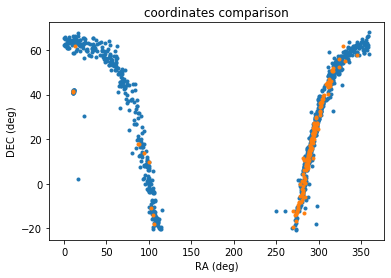

In [12]:
plt.scatter(cep.loc[cepr]['RAdeg'],cep.loc[cepr]['DEdeg'],marker='.')
plt.scatter(cep.loc[cepm]['RAdeg'],cep.loc[cepm]['DEdeg'],marker='.')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('coordinates comparison')

17.997311875
279.17582675000006


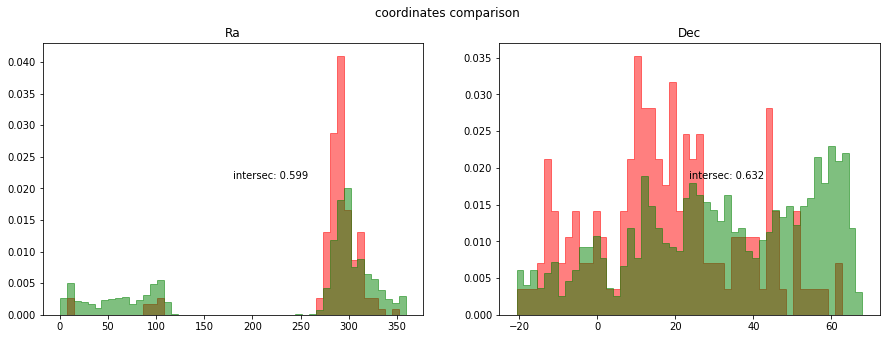

In [13]:
bn=50
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('coordinates comparison')
n, bins, patches =ax1.hist((cep.loc[cepr]['RAdeg'],cep.loc[cepm]['RAdeg']), bins=bn,density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
ax1.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
ax1.set_title('Ra')
ax1.set_xlabel('')
n, bins, patches =ax2.hist((cep.loc[cepr]['DEdeg'],cep.loc[cepm]['DEdeg']), bins=bn,density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
ax2.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
ax2.set_title('Dec')
plt.show
print(cep.loc[cepm]['DEdeg'].mean())
print(cep.loc[cepm]['RAdeg'].mean())

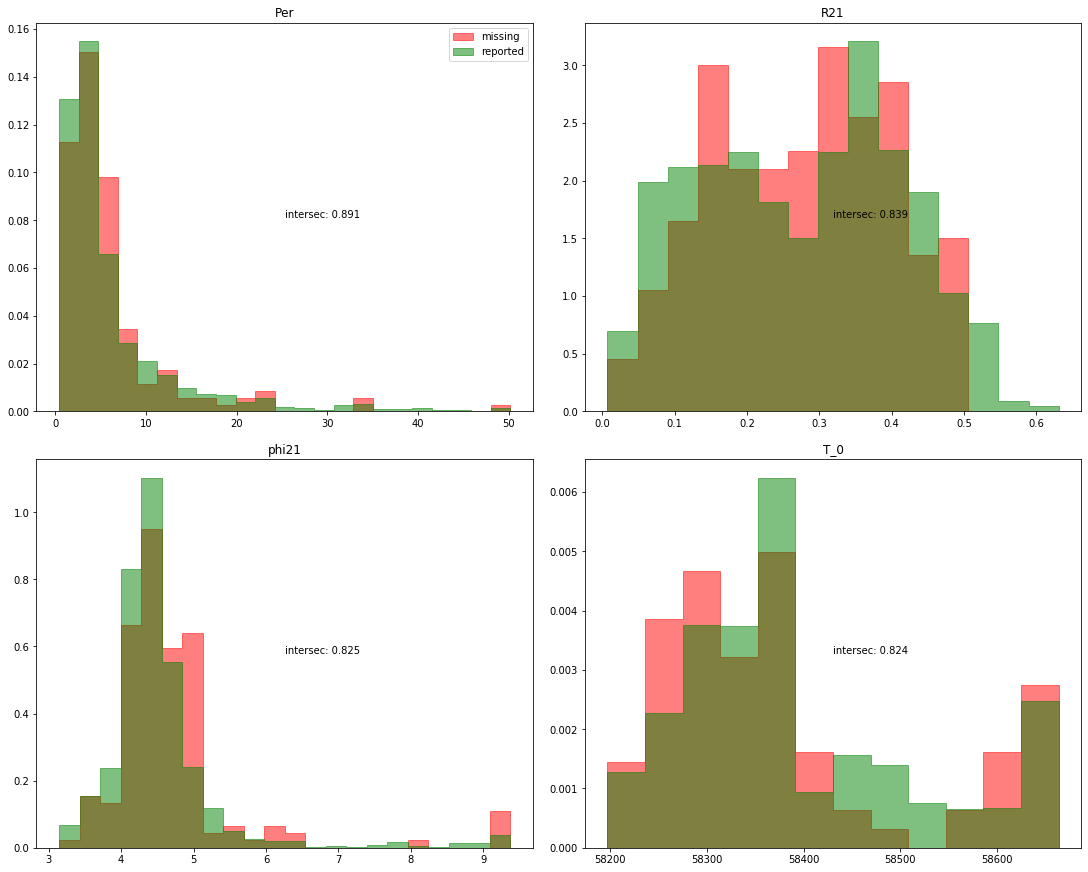

In [14]:
lab=('missing','reported')
params=cep.columns[4:8]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
ints=[]
for ax, par in zip(axs.flat, params):
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par],cep.loc[cepm][par]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

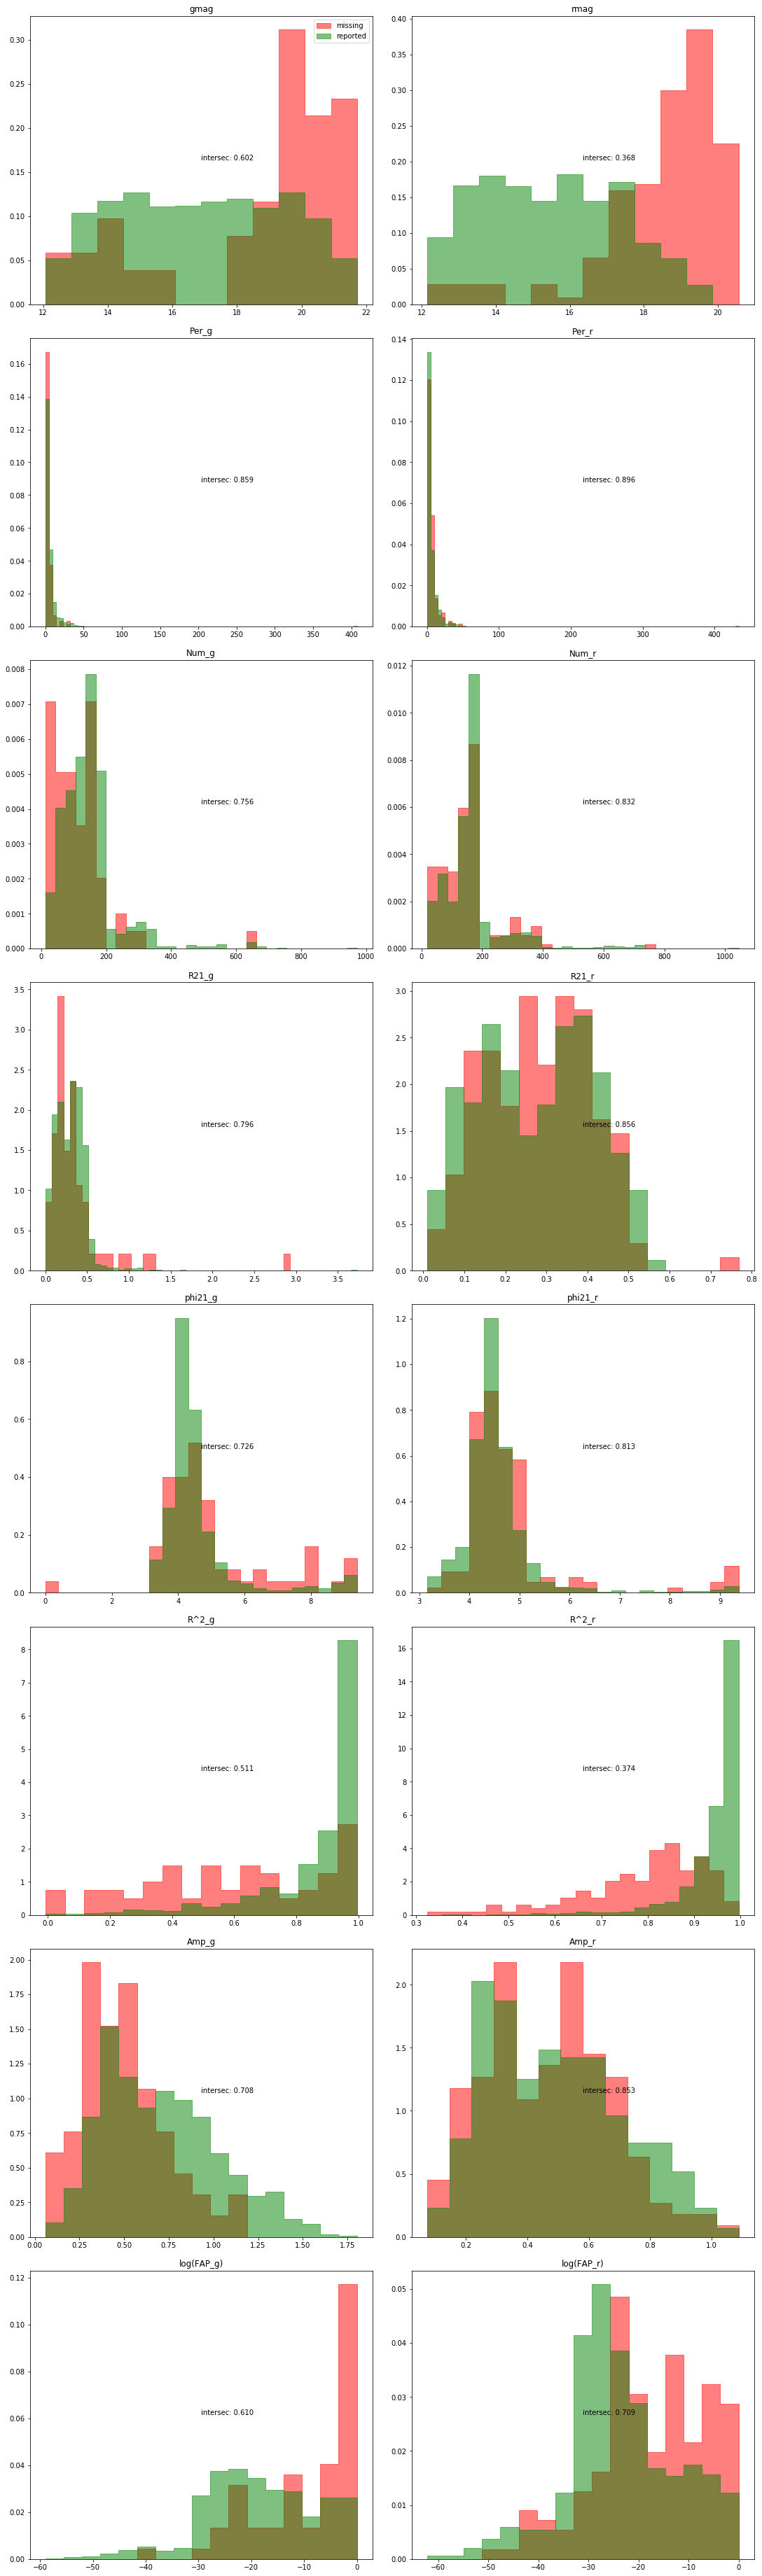

In [15]:
## mask stars with no obs in a band por the band parameters
params=cep.columns[8:-2]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
i=0
for ax, par in zip(axs.flat, params):
    m='gmag' if (i % 2) == 0 else 'rmag'
    i+=1
    maskm=cep.loc[cepm][m]!=0.
    maskr=cep.loc[cepr][m]!=0.
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par][maskr],cep.loc[cepm][par][maskm]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

### Observaciones:

1620 cepheid variables included on the list, 1438 reported by ALeRCE, 182 missing
11.2% missing

12.7% cep I missing, 6.1% cep II missing

the coordinates of the missing stars are concentrated at ra=279 dec=18 deg aproz, with a notable absence in the region ra=0-100, dec=50-67

#### Parameters with intersection below 0.5:

 gmag, rmag:missing stars concentrated at weaker magnitudes, mag<19 aprox
 
 R² both bands: greater number of reported at values closer to 1

#### Parametros:


RAdeg   Right Ascension in decimal degrees (J2000)        
DEdeg   Declination in decimal degrees (J2000)            
Per     Period (d)                                           
R21     Ratio of a_2_/a_1_  (amplitude ratio )                             
phi21   The {phi}_2_ - 2*{phi}_1_ (phase difference)                                                
d       T_0     HJD of Minimum                                    
gmag    Mean ZTF g band magnitude                         
rmag    Mean ZTF r band magnitude                         
d       Per_g   Period determined in g band                       
d       Per_r   Period determined in r band                       
Num_g   Number of detections in g band                    
Num_r   Number of detections in r band                    
R21_g   Ratio of a_2_/a_1_ in g band                      
R21_r   Ratio of a_2_/a_1_ in r band                      
phi21_g The {phi}_2_ - 2*{phi}_1_ in g band               
phi21_r The {phi}_2_ - 2*{phi}_1_ in r band               
R^2_g   R-square in g band                                
R^2_r   R-square in r band                                
mag     Amp_g   Amplitude in g band                               
mag     Amp_r   Amplitude in r band                               
log(FAP_g) False alarm probability in g band                 
log(FAP_r) False alarm probability in r band                 
Type    Variable type
Delta_min_g Minumum difference in g band
Delta_min_r Minumum difference in r band           

## Reported stars

In [16]:
cepalr=pd.DataFrame(cepalr)
#cepalr2=pd.DataFrame(cepalr2)
classdict={'Other': 0,'Ceph': 1,'LPV': 4,'RRL': 5,'EB': 3,'SNe': 6,'DSCT': 2,'Blazar': 8,'CV/Nova': 9,'SLSN': 14,'AGN': 18,'SN': 19,'Variable Star': 20,'Asteroid': 21,'Bogus': 22,'SNIa': 10,'SNIbc': 11,'SNII': 12,'SNIIn': 13,'EBSD/D': 15,'EBC': 16,'Periodic-Other': 17,'AGN-I': 7,'RS-CVn': 23,'QSO-I':24}
classdict = {v: k for k, v in classdict.items()}
cepalr=cepalr.replace({"classearly": classdict})
cepalr=cepalr.replace({"classrf": classdict})

Text(0.5, 0, 'class')

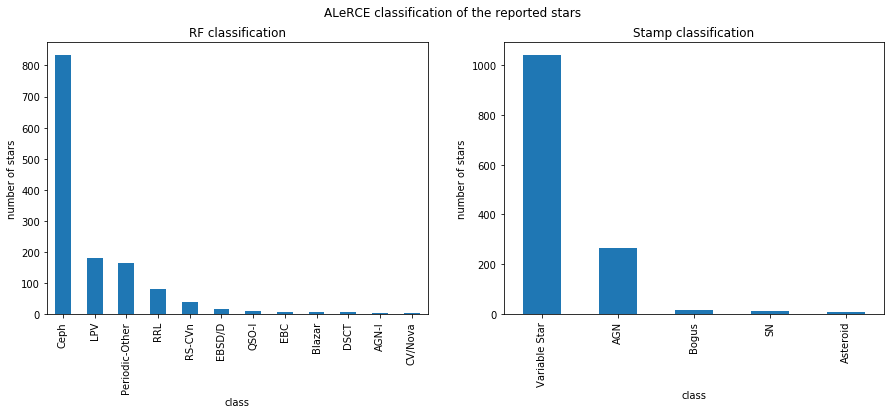

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
cepalr['classrf'].value_counts().plot(ax=ax1,kind='bar',title='RF classification')
cepalr['classearly'].value_counts().plot(ax=ax2,kind='bar',title='Stamp classification')
fig.suptitle('ALeRCE classification of the reported stars')
ax1.set_ylabel('number of stars')
ax1.set_xlabel('class')
ax2.set_ylabel('number of stars')
ax2.set_xlabel('class')

### Parameter comparisons between alerce and chen values
Comparison for the ALeRCE reported stars classified as ceph vs other for the difference between the magnitude values given by the two reports 

In [18]:
alr_cep=cepalr[(cepalr['classrf']=='Ceph')]
alr_other=cepalr[(cepalr['classrf']!='Ceph')]

/home/emilio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/home/emilio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


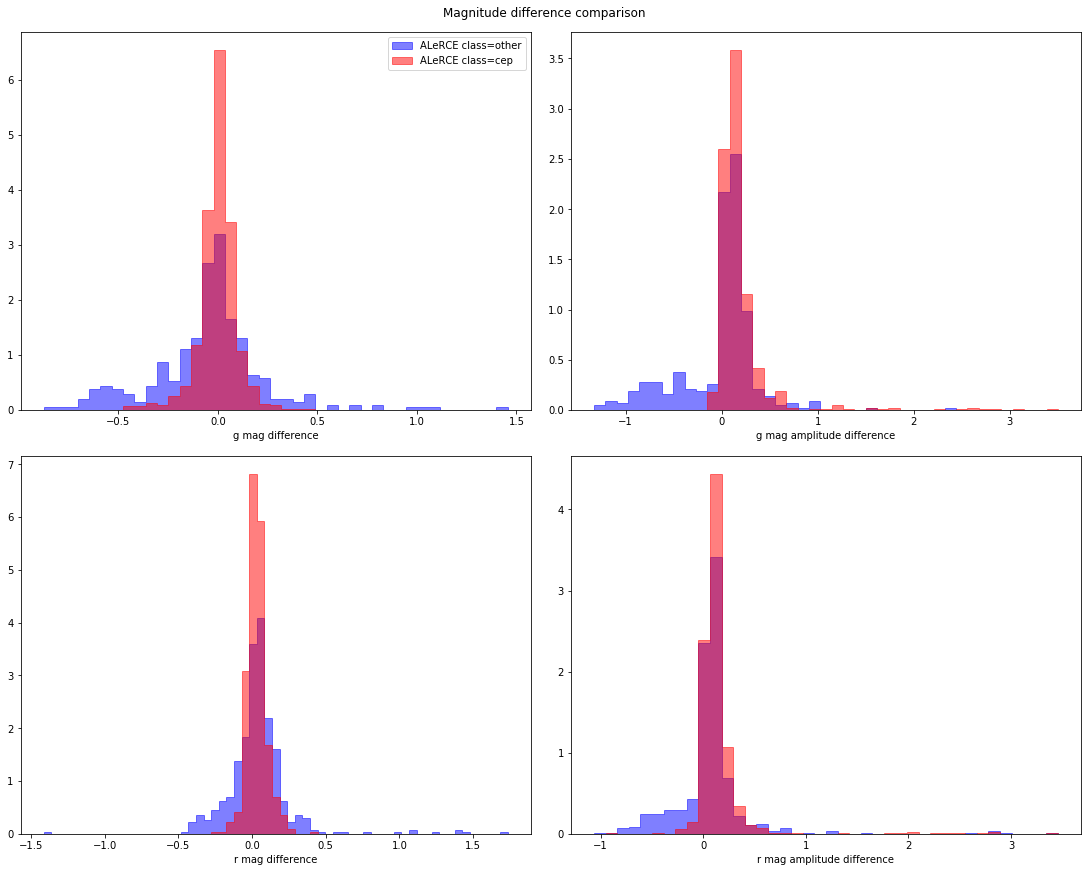

In [19]:

fig1, axs = plt.subplots(2,2,  constrained_layout=True,figsize=(15,3*4))
fig1.suptitle('Magnitude difference comparison')
flt=('g','r')
for ax, b in zip(axs, flt):
    hg1=((alr_cep['mean_magpsf_'+b].values-cep.loc[alr_cep['idlist']][b+'mag']).where(cep.loc[alr_cep['idlist']][b+'mag']>0))
    hg2=((alr_other['mean_magpsf_'+b].values-cep.loc[alr_other['idlist']][b+'mag']).where(cep.loc[alr_other['idlist']][b+'mag']>0))
    hag1=((alr_cep['max_magpsf_'+b].values-alr_cep['min_magpsf_'+b].values-cep.loc[alr_cep['idlist']]['Amp_'+b]).where(cep.loc[alr_cep['idlist']][b+'mag']>0))
    hag2=((alr_other['max_magpsf_'+b].values-alr_other['min_magpsf_'+b].values-cep.loc[alr_other['idlist']]['Amp_'+b]).where(cep.loc[alr_other['idlist']][b+'mag']>0))

    ax[0].hist((hg1,hg2), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('r','b'))
    ax[0].set_xlabel(b+' mag difference')
    ax[1].hist((hag1,hag2), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('r','b'))
    ax[1].set_xlabel(b+' mag amplitude difference')
axs[0][0].legend(('ALeRCE class=other','ALeRCE class=cep'))

The plot shows a slight increase in the magnitud difference on the stars with other classification, could mean a less accurate magnitude measurement wich clould lead to a less accurate classification.
For the amplitude in the alerce value was used the fference between min and max magnitude instead, so the comparison is not a reliable.

## Objects classified as ceph by ALeRCE

In [20]:
#////
records_per_page = 100000
params = {
    "records_per_pages": records_per_page,
    "query_parameters": {
        "filters": {
            "classrf": 1,
            #"classearly":classearly,
            "nobs": {
                #"min": min_nobs,
                #"max": max_nobs
            }
        },
        "dates": {
                "firstmjd": {
                   # "min": min_firstmjd,
                    #"max": max_firstmjd
                }
            },
    }
}
alrcep = client.query(params, format='pandas')

In [21]:
mask1=[a not in cepalr.index for a in alrcep.index]

In [22]:
alrxm_i=[]
alrxm=[]

tol=2*0.00027777777777778 
for oid, ob in alrcep.iterrows():
    xde=t2[(np.isclose(t2.DEdeg, ob.meandec, atol=tol,rtol=0.0))]
    mx=xde[np.isclose(xde.RAdeg,ob.meanra,atol=tol,rtol=0.0)]
    if mx.shape[0]>1:
        print(mx.index.values)
    if mx.shape[0]==1:
        alrxm_i.append(oid)
        alrxm.append(mx.index.values[0])
        
    

In [23]:
alrxm=t2.loc[alrxm][~t2.loc[alrxm].Type.isin(['CEP','CEPII'])]

In [24]:
alrxm.Type.value_counts()

EA       2016
EW       1889
RSCVN    1843
RR        543
BYDra     394
SR        206
RRc        98
DSCT       39
Mira        8
Name: Type, dtype: int64

- EA Systems - Algol Type Systems
- EB Systems - Beta Lyrae type systems
- EW Systems - W UMa type systems
- RS Canum Venaticorum variable
- RR Lyrae
- BY Draconis variable
- Semiregular variable stars are giants or supergiants 
- RRc rr lyrae
- delta Scuti variable

### Basic statistics:

In [25]:
print(str(alrcep.shape[0])+' objects classified as cep by ALeRCE')
print(str(len(alrxm_i))+' included in the Chen+ list')
print(str(alrxm.shape[0])+' present in the table with other classification')

15177 objects classified as cep by ALeRCE
7917 included in the Chen+ list
7036 present in the table with other classification


of the 7023 stars classified as other tipe by Chen+  5736 (82%) are binary systems (EA, EW, RSCVN)

### Parameter analysis of the stars with other classificacion on Chens list
#### Chen parameters:
Same previous analysis but with the alerce ceph stars clssified as such vs other classification on Chens list

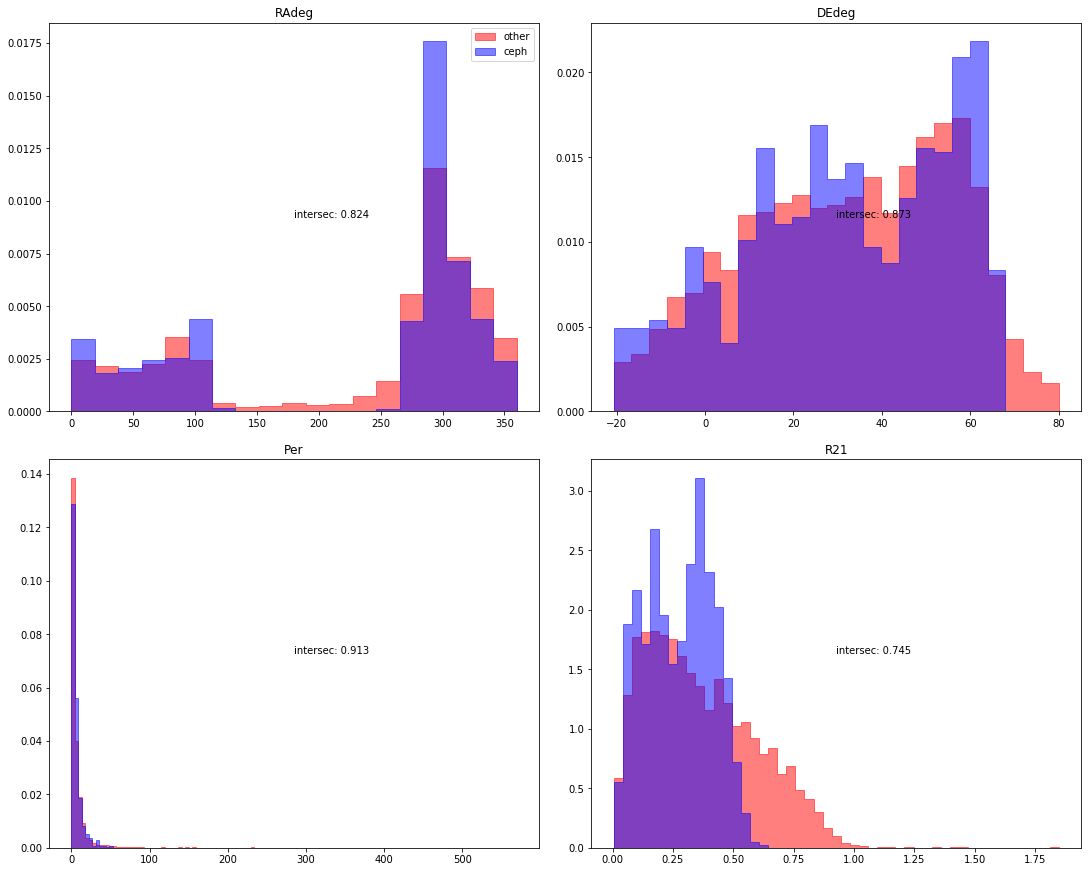

In [26]:
lab=('other','ceph')
params=cep.columns[2:6]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
ints=[]
for ax, par in zip(axs.flat, params):
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par],alrxm[par]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('b','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

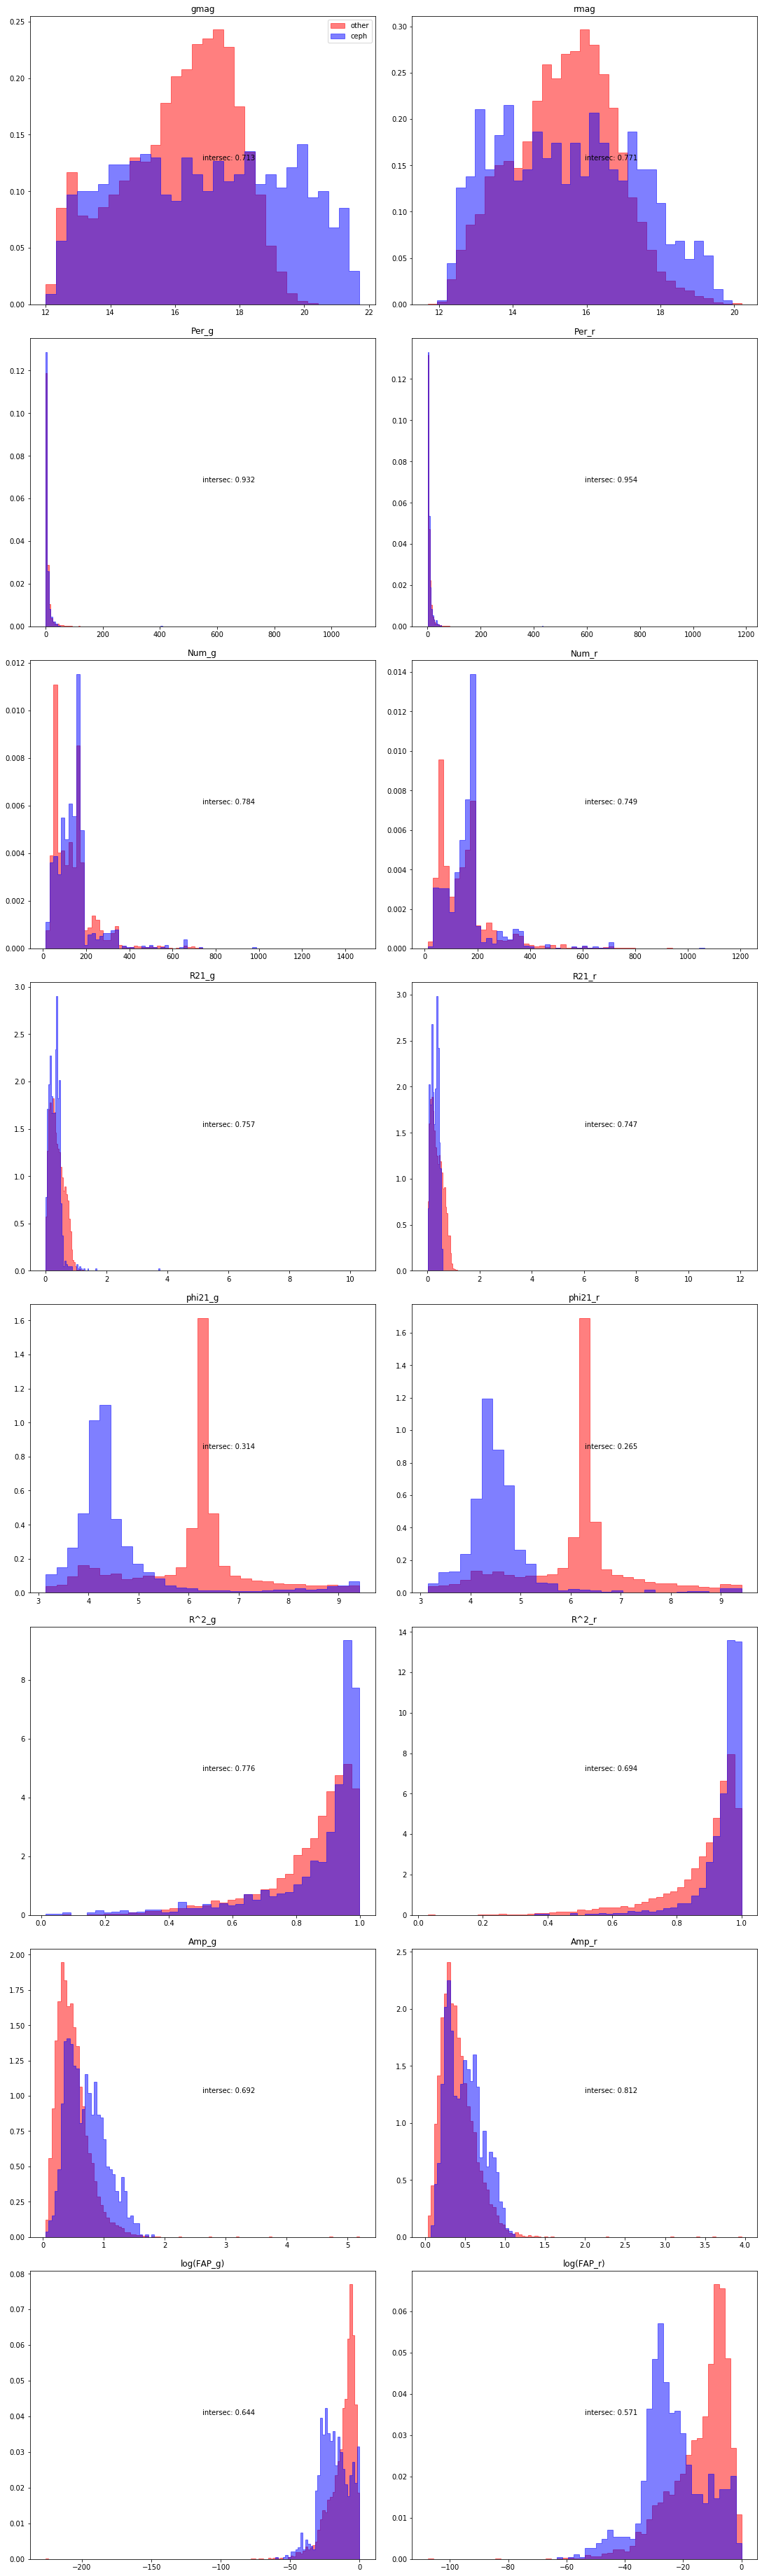

In [27]:
params=cep.columns[8:-2]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
i=0
for ax, par in zip(axs.flat, params):
    m='gmag' if (i % 2) == 0 else 'rmag'
    i+=1
    maskm=alrxm[m]!=0.
    maskr=cep.loc[cepr][m]!=0.
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par][maskr],alrxm[par][maskm]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('b','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

Comparing the parameters from chens list the stars only show the expected differences on the classification parameters (R, phi,). The only relevant characteristic is a slight concentration on the magnitude of the classified as other at gmag=17 and rmag=16 aprox.

#### ALeRCE parameters:

In [28]:
alrcep['amp_g']=alrcep['max_magpsf_g']-alrcep['min_magpsf_g']
alrcep['amp_r']=alrcep['max_magpsf_r']-alrcep['min_magpsf_r']

In [29]:
mskcep=[a in cepalr.index for a in alrcep.loc[alrxm_i].index]
msknocep=[a not in cepalr.index for a in alrcep.loc[alrxm_i].index]
cls_cep=alrcep.loc[alrxm_i][mskcep]
cls_other=alrcep.loc[alrxm_i][msknocep]

In [30]:
print('objects with no r band data:')
print(str(100-sum(alrcep.loc[alrxm_i]['sigma_magpsf_r']>0)*100/len(alrcep.loc[alrxm_i]))+'% all')
print(str(100-sum(cls_other['sigma_magpsf_r']>0)*100/len(cls_other))+'% other')
print(str(100-sum(cls_cep['sigma_magpsf_r']>0)*100/len(cls_cep))+'% cep')


objects with no r band data:
17.8476695718075% all
17.603049124788257% other
19.927971188475397% cep


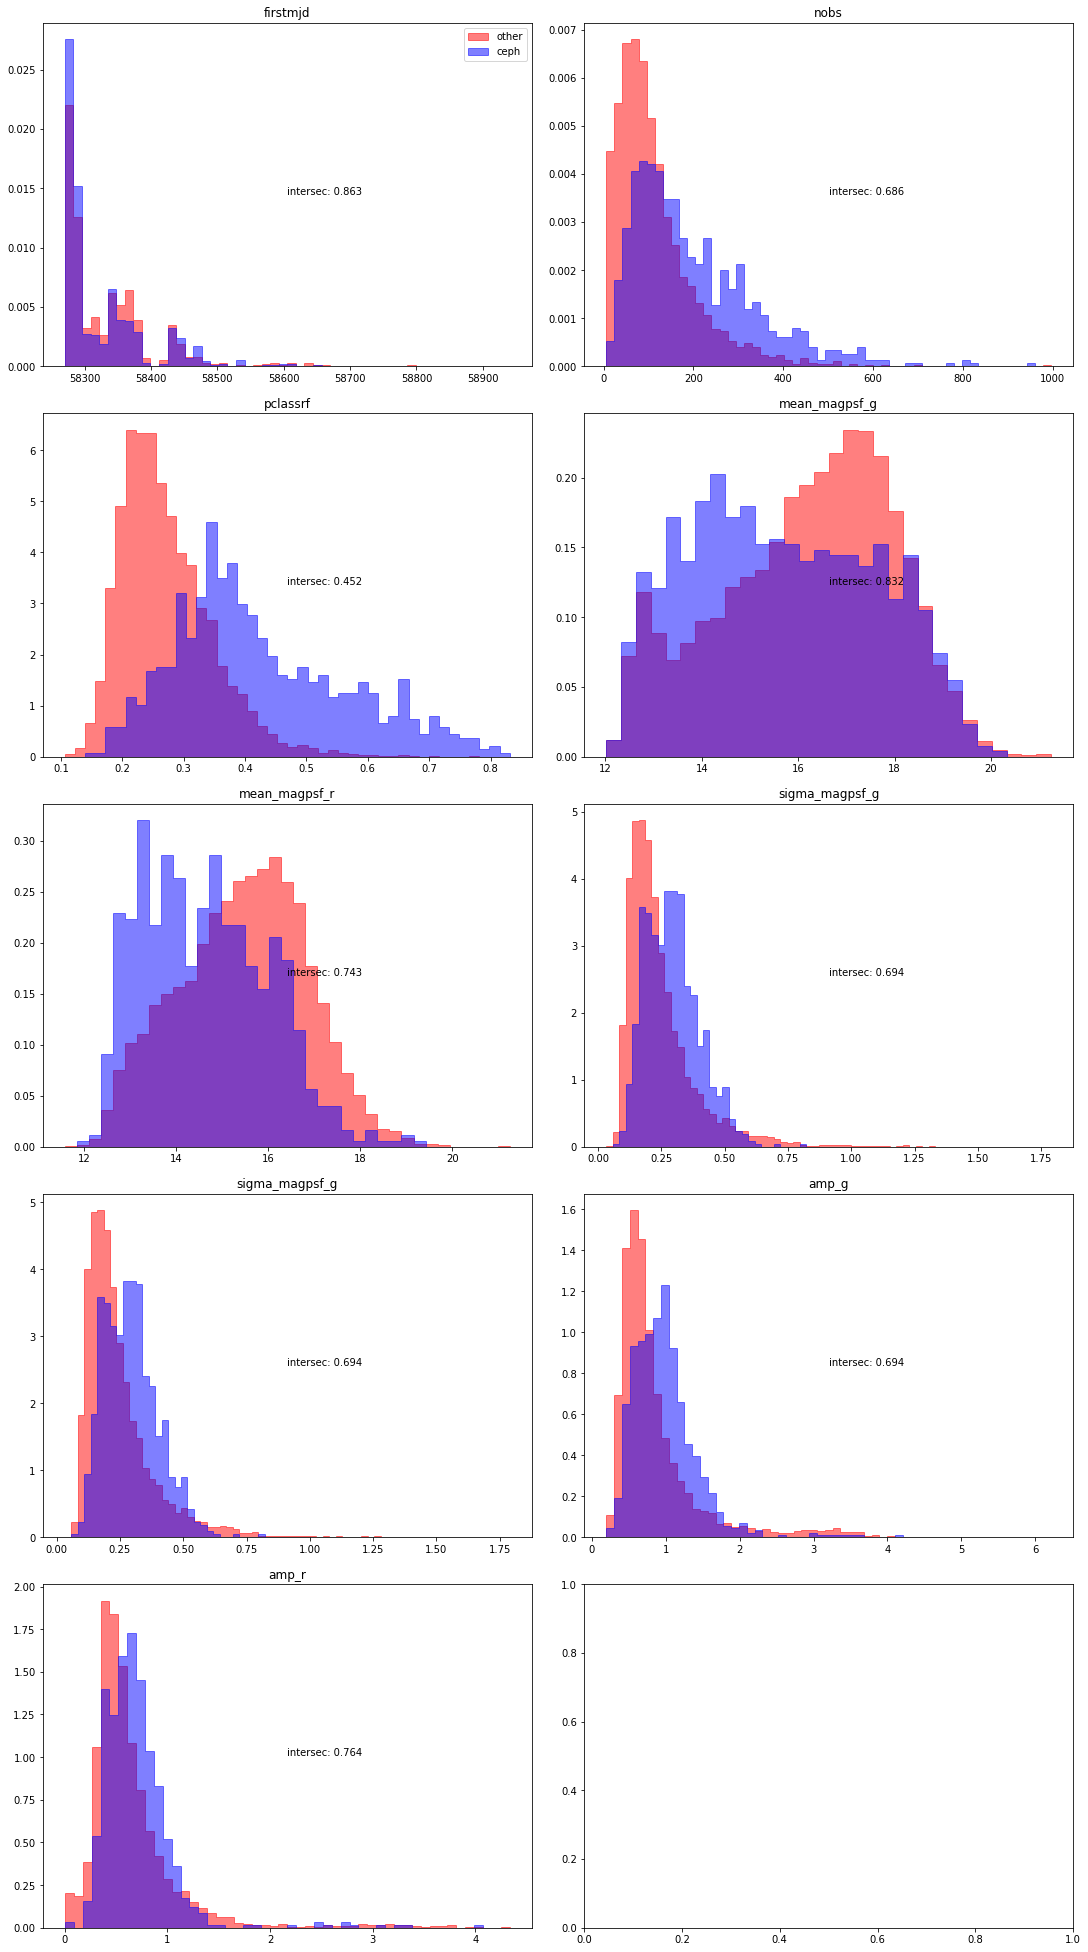

In [31]:
lab=('other','ceph')
params=('firstmjd','nobs','pclassrf','mean_magpsf_g','mean_magpsf_r','sigma_magpsf_g','sigma_magpsf_g','amp_g','amp_r')
fig1, axs = plt.subplots(len(params)//2+1, 2,  constrained_layout=True,figsize=(15,3*len(params)))
ints=[]
for ax, par in zip(axs.flat, params):
    ax.set_title(par)
    mo=cls_other[par]>0
    mc=cls_cep[par]>0
    n, bins, patches =ax.hist((cls_cep[mc][par],cls_other[mo][par]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('b','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

From the ALeRCE values the main relevant aspect shown is lower number of obsevations for the incorrectly classified (according to CHen+), also a lower probability classification as expected. The amplitude and sigma also show differentiation as it should for different types.